# Scikit-learn 1

Introduction to working with `scikit-learn`, _the_ machine learning library for Python.

## 0 Setting up your system

Here is the recommended way to set up your system:

- install `miniconda`, get it from: https://conda.io/miniconda.html
- use it to install at least: `numpy`, `scikit-learn`, `seaborn`, `matplotlib`, `pandas`:

```
conda install numpy scikit-learn seaborn matplotlib pandas
```

- install `jupyter`, if you do not have it yet - also with `conda`:

```
conda install jupyter
```

- start up jupyter with:
```  
jupyter notebook
```

- this should open your browser automatically, if not open a browser window and navigate to localhost with the specified port

## 1 Loading Datasets

This sections explains how you can load datasets into `scikit-learn`.

### Loading a toy data set

`scikit-learn` ships with a number of toy datasets that you can simply import. Here is an example, the IRIS dataset.

In [0]:
# import data loading function (without actually loading the data yet)
from sklearn.datasets import load_iris
load_iris

<function sklearn.datasets.base.load_iris>

In [0]:
# load data and assign it to a variable
iris = load_iris() # convention: variable name describes data set, instead of a generic name
type(iris)

sklearn.utils.Bunch

All toy datasets come in the same format and have the same attributes (well, at least `data` and `target`):

In [0]:
# what attributes does the `data` variable have?
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [0]:
# familiarize yourself with the data set before you do anything else
# note: see how statistics is relevant here?
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

The `data` attribute is a list of lists, where the outer list is a list of observations ("samples"). Each observation is itself a list - a list of features. Or, more precisely, an observation is a list of feature **values**.

In [0]:
# print the feature values of the first observation
iris.data[0], iris.target[0]

(array([5.1, 3.5, 1.4, 0.2]), 0)

What do those feature values correspond to? The `feature_names` attribute explains this:

In [0]:
iris.feature_names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

Important convention: list of observations is assigned to the variable `X`, the list of targets (or labels, or responses, or classes, even though that last one is sloppy) is assigned to `y`:

In [0]:
X = iris.data
y = iris.target
# first 10 observations together with their class:
print("{}\t\t{}".format("Observation", "Response"))
for observation, response in zip(X[:10], y[:10]):
    print("{}\t{}".format(observation, response))

Observation		Response
[5.1 3.5 1.4 0.2]	0
[4.9 3.  1.4 0.2]	0
[4.7 3.2 1.3 0.2]	0
[4.6 3.1 1.5 0.2]	0
[5.  3.6 1.4 0.2]	0
[5.4 3.9 1.7 0.4]	0
[4.6 3.4 1.4 0.3]	0
[5.  3.4 1.5 0.2]	0
[4.4 2.9 1.4 0.2]	0
[4.9 3.1 1.5 0.1]	0


What does a response of 0 mean?

In [0]:
print(set(y))
iris.target_names

set([0, 1, 2])


array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

** Question for you: why is `X` uppercase, when `y` is not?**

Both the observations and responses are of type `numpy.ndarray`, a flexible container for scalars, vectors and matrices:

In [0]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

`ndarray`s have a convenient attribute `shape` that gives you the dimensions of the object in question:

In [0]:
X.shape, y.shape

((150, 4), (150,))

**Question for you: what do those numbers mean? Which of them mean columns, which mean rows?**

### Loading an external dataset in a standard format like CSV

Loading an existing dataset for use with `scikit-learn` is also easy. We use a handy library called `pandas` that lets you manipulate data in an R-like fashion:

In [0]:
# always import as `pd`, this is a convention
import pandas as pd

Import an example dataset from ICS UCI, find more information here: https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names:

In [0]:
# read CSV directly from URL
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data")

Variables created in this way are `pandas` `DataFrame` objects that have a variety of convenient attributes, for instance the `head` or `tail` or `describe` methods:

In [0]:
print type(data)
# to display all other attributes of the data frame: dir(data)
data.head()

<class 'pandas.core.frame.DataFrame'>


30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1

As you can see, something is not quite right. The first observation is mistaken as the row of column headers. Fixing this:

In [0]:
# define column names
col_names = ['patient_age', 'operation_year', 'auxiliary_node_count', 'survival_status']

# read CSV directly from URL, indicate that there are no headers
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data", header=None, names=col_names)
data.head()

Data frames also have a shape attribute and named columns can be accessed by their name ("bracket notation"):

In [0]:
print data.shape
# access last column directly
print(data.survival_status.head())

**Question for you: Again, what does the output of `shape` mean, in your opinion?**

As with a toy dataset, the convention is to assign the data to `X` and `y`:

In [0]:
# define columns that are features
feature_cols = ['patient_age', 'operation_year', 'auxiliary_node_count']
X = data[feature_cols]
y = data.survival_status # alternatively, data['survival_status']

In [0]:
print(X.head())
print()
print(y.head())

### Loading data that is neither toy nor in a standardized format

If your data is none of the above, it is your job to process it until you can assign it to `X` and `y`, both of which must be of type `numpy.ndarray`.

### Test your understanding of data sets

1) Load a different data set from `scikit-learn`, the so-called diabetes data set. How many samples are there? How many features are there?

In [0]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.data.shape)
print(diabetes.target.shape)
print("hi")

(442, 10)
(442,)
hi


2) Load a TSV file: http://indeedeng.github.io/imhotep/files/worldcupplayerinfo_20140701.tsv with pandas. Inspect the data to make sure headers look right.

In [0]:
data = pd.read_csv("http://indeedeng.github.io/imhotep/files/worldcupplayerinfo_20140701.tsv", sep="\t")
data.head()

Group Country  Rank  Jersey  Position  Age  Selections                Club  \
0     A  Brazil     3       1    Goalie   31           9         Botafogo      
1     A  Brazil     3      12    Goalie   34          80        Toronto FC     
2     A  Brazil     3      22    Goalie   31           6  Atletico Mineiro     
3     A  Brazil     3       2  Defender   31          75        Barcelona      
4     A  Brazil     3      13  Defender   30          12     Bayern Munich     

        Player Captain  Unnamed: 10  Unnamed: 11  
0    Jefferson       0          NaN          NaN  
1  Julio Cesar       0          NaN          NaN  
2       Victor       0          NaN          NaN  
3   Dani Alves       0          NaN          NaN  
4        Dante       0          NaN          NaN

## 2 Visualizing datasets

Once data is loaded into memory, it can be useful to visualize it, before you train any machine learning system.

In [0]:
import seaborn as sns # convention, always import as `sns`
import matplotlib.pyplot as plt # same here

# matplotlib "magic" command
%matplotlib inline

### Visualizing regression data

In [0]:
# load a new dataset, this time a REGRESSION problem:
from sklearn.datasets import load_boston
boston = load_boston()

# convert to data frame, check output
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['price'] = boston.target
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

One way to get insight from regression data is a so-called "pair plot" that emphasizes the _pairwise_ relationships in your dataset. Seaborn can generate such plots:

/Users/mathiasmuller/miniconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


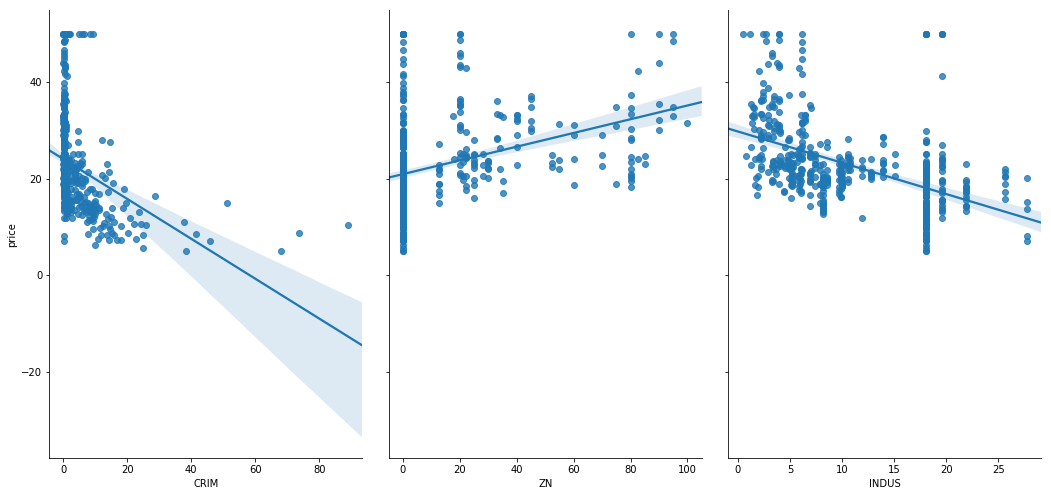

In [0]:
# regression plot for only the first 3 features, plotted against the target variable
sns.pairplot(df, x_vars=boston.feature_names[:3], y_vars='price', size=7, aspect=0.7, kind='reg')

Check out http://www.neural.cz/dataset-exploration-boston-house-pricing.html for more cool examples specifically with the Boston House Pricing data set and the libraries we have used.

Another example, taken from the seaborn pairplot documentation (http://seaborn.pydata.org/generated/seaborn.pairplot.html):

### Visualizing classification data

If your data does not describe a regression problem (i.e. if the response variable is not continuous, but categorical), then regression plots do not make much sense.


In [0]:
iris = load_iris() # function from scikit-learn
sns.set(style="ticks", color_codes=True)

# `df` is the conventional name for a dataframe variable
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0

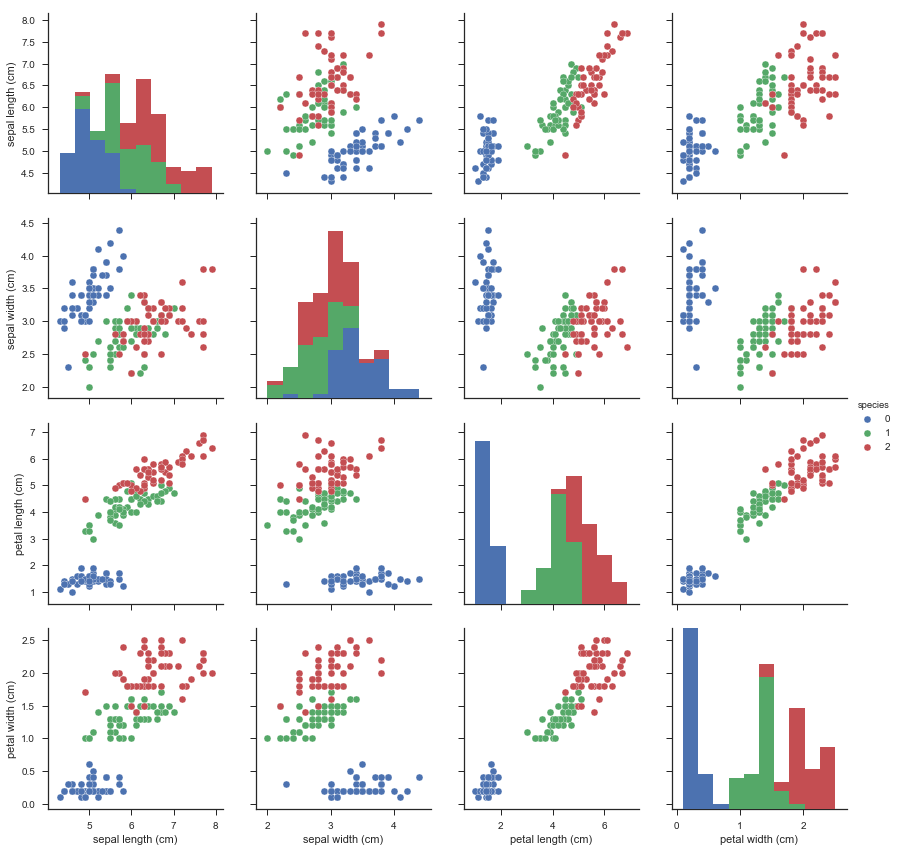

In [0]:
# target variable is only used for coloring, both x axis and y axis are feature names
sns.pairplot(df, hue="species", size=3, x_vars=iris.feature_names, y_vars=iris.feature_names)

A lot to discover in those plots, for instance:
- how well individual features can tell apart observations of different classes
- in the diagonal: how feature values are distributed overall, and in each class

If you're interested, find out more: http://seaborn.pydata.org/tutorial.html, http://pandas.pydata.org/ and http://scikit-learn.org/stable/datasets/index.html.

### Test your understanding of visualizing data

Consider the image below, a pairplot generated with seaborn:

![index.png](attachment:index.png)

1) Does it show a regression or classification data set?

2) What can you say about the individual features a, b and c?